In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display
import requests
# from imblearn.under_sampling import RandomUnderSampler

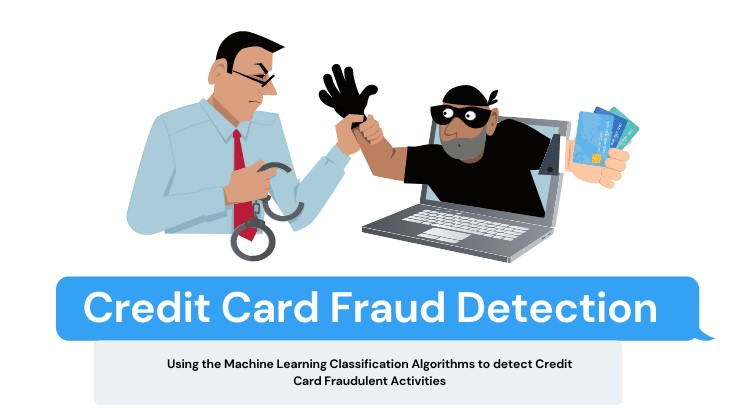

In [2]:
image_url = 'https://miro.medium.com/v2/resize:fit:750/1*Lci4cCUXgb6zZRyKmgWfVA.png'
response = requests.get(image_url)
if response.status_code == 200:
    display(Image(data=response.content))
else:
    print(f"Failed to retrieve the image. Status code: {response.status_code}")

# Credit Card Fraud Detection

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Checking the Linearity of Data

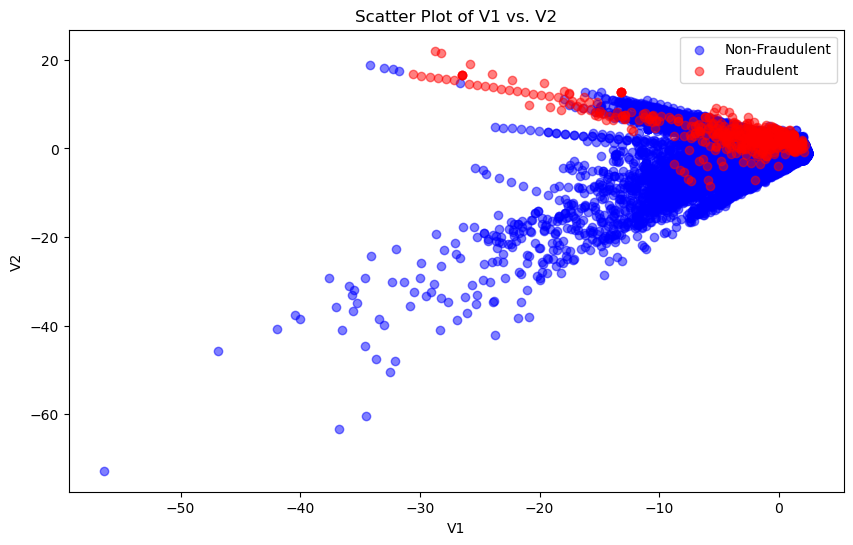

In [5]:
feature1 = 'V1'
feature2 = 'V2'

fraudulent = data[data['Class'] == 1]
non_fraudulent = data[data['Class'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(non_fraudulent[feature1], non_fraudulent[feature2], c='blue', label='Non-Fraudulent', alpha=0.5)
plt.scatter(fraudulent[feature1], fraudulent[feature2], c='red', label='Fraudulent', alpha=0.5)

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Scatter Plot of {feature1} vs. {feature2}')

plt.legend()
plt.show()

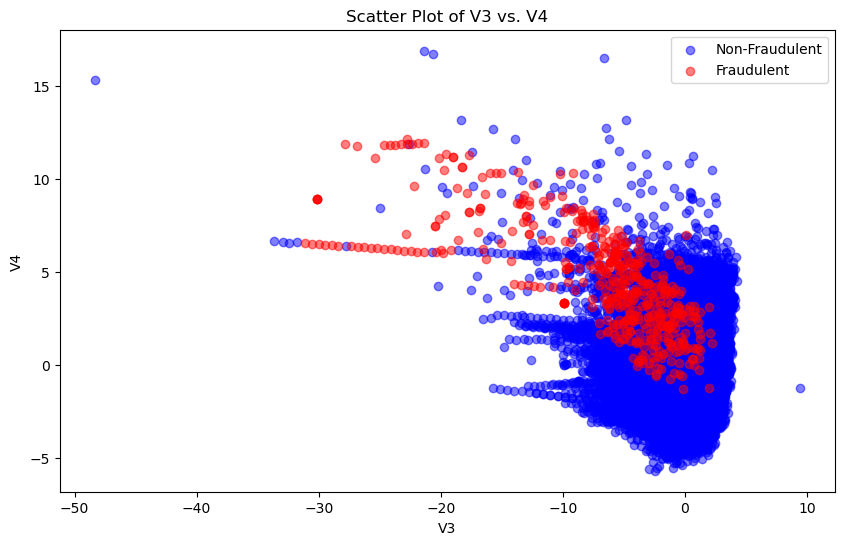

In [6]:
feature1 = 'V3'
feature2 = 'V4'

fraudulent = data[data['Class'] == 1]
non_fraudulent = data[data['Class'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(non_fraudulent[feature1], non_fraudulent[feature2], c='blue', label='Non-Fraudulent', alpha=0.5)
plt.scatter(fraudulent[feature1], fraudulent[feature2], c='red', label='Fraudulent', alpha=0.5)

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Scatter Plot of {feature1} vs. {feature2}')

plt.legend()
plt.show()

Since the data is non-linear then we will apply Radial Basis Function (RBF) Kernel

## Data preprocessing

In [7]:
data.isnull().sum()
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

## Split the data into training and testing sets

In [8]:
X = data.drop('Class', axis=1) 
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialize and train the SVM model

In [9]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

SVC()

## Predictions

In [10]:
y_pred = svm_model.predict(X_test)

## Model evaluation

In [11]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.998413985126705
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.00      0.00      0.00        90

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746



In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier() 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 99.90131463010609


In [18]:
print("Precision:",metrics.precision_score(y_test, y_pred)*100)

Precision: 67.3469387755102


In [19]:
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Recall: 73.33333333333333
